# From B-H Curves to Magnetic Permeability and Its Slope using Splines 

## Import Packages

In [2]:
using BSplineKit
using Plots 

## Section 1:/ Introduction 
To goal of this notebook is three-fold. 
1. The <b>first</b> goal is to generate a B-H curve using the following three parameters: the (assumed linear) permeability of the material prior to saturation, the (assumed linear) permeability of the material after to saturation and the value of normB2 for which saturation does occur. The data we generate is piecewise linear and therefore non-differentiable. 
2. The <b>second</b> goal is to approximate the piece-wise linear B-H curve using a differentiable spline. The spline is constructed by sampling the piece-wise linear BH-curve. 
3. The <b>third</b> goal is to differentiate the B-H spline approximation once to obtain the magnetic permeability $\mu(normB2)$ and to differentiate twice to obtain the slope of the magnetic permeability $d \mu(normB2) / dnormB2$. These derivatives can be used as used inside the FEM solver.  

## Section 2:/ Generate BH Curve Defined by 3 Parameters 

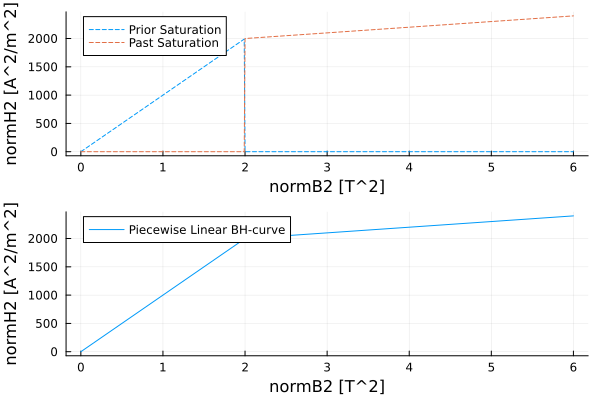

In [3]:
# three parameters that define piecewise linear B-H curve 
murLinear = 1000;
murSaturated    = 100; 
bnorm2Saturared = 2

# piecewise linear functions 
hnorm2OffSet            = (murLinear-murSaturated)*bnorm2Saturared;
murLinearFct(bnorm2)    = murLinear*bnorm2*(bnorm2<bnorm2Saturared) 
murSaturatedFct(bnorm2) = (murSaturated*bnorm2+hnorm2OffSet)*(bnorm2>=bnorm2Saturared)
mur(bnorm2)             = murLinearFct(bnorm2) + murSaturatedFct(bnorm2)

bnorm2          = Vector(0:0.01:6)
hnorm2Linear    = murLinearFct.(bnorm2);
hnorm2Saturated = murSaturatedFct.(bnorm2);
hnorm2 = mur.(bnorm2)

p1 = plot(bnorm2, hnorm2Linear,ls=:dash,label="Prior Saturation")
p1 = plot!(bnorm2, hnorm2Saturated,ls=:dash,label="Past Saturation")
xlabel!("normB2 [T^2]") 
ylabel!("normH2 [A^2/m^2]")
p2 = plot(bnorm2, hnorm2,label="Piecewise Linear BH-curve")
xlabel!("normB2 [T^2]") 
ylabel!("normH2 [A^2/m^2]")
plot(p1,p2,layout=(2,1))

## Section 3:/ Approximate Piecewise BH-curve by Smooth Splines 

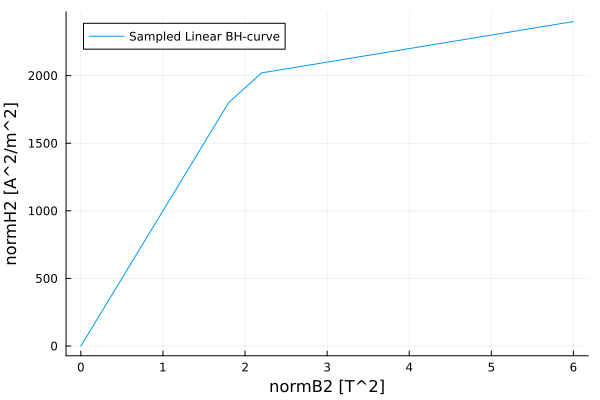

In [4]:
bnorm2LinearSampled    = Vector(0:.1:bnorm2Saturared-0.2)
bnorm2SaturatedSampled = Vector(bnorm2Saturared+0.2:.1:6)
hnorm2LinearSampled    = murLinearFct.(bnorm2LinearSampled)
hnorm2SaturatedSampled = murSaturatedFct.(bnorm2SaturatedSampled)
bnorm2Sampled          = [bnorm2LinearSampled; bnorm2SaturatedSampled]
hnorm2Sampled          = [hnorm2LinearSampled; hnorm2SaturatedSampled]
plot(bnorm2Sampled, hnorm2Sampled,label="Sampled Linear BH-curve")
xlabel!("normB2 [T^2]") 
ylabel!("normH2 [A^2/m^2]")

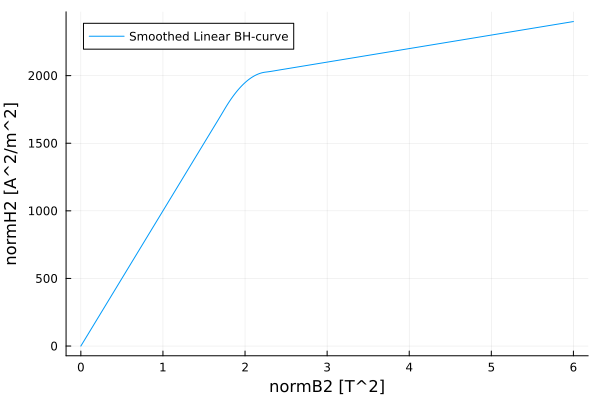

In [5]:
hnormSpline     = interpolate(bnorm2Sampled, hnorm2Sampled, BSplineOrder(3));
bnorm2          = Vector(0:0.01:6)
hnormSplineEval = (Derivative(0) * hnormSpline).(bnorm2)
plot(bnorm2,hnormSplineEval,label="Smoothed Linear BH-curve")
xlabel!("normB2 [T^2]") 
ylabel!("normH2 [A^2/m^2]")

## Section 4: Differentiate BH-Curve to get permeability and its slope

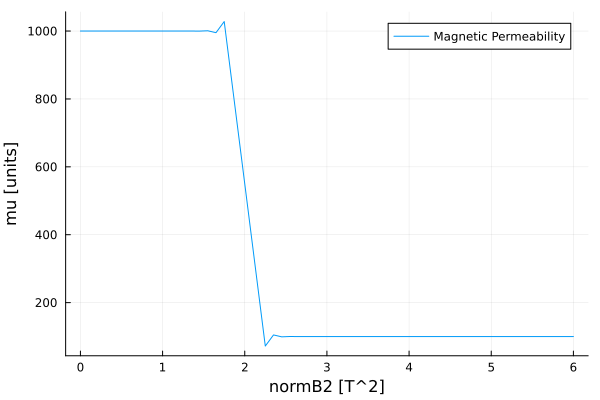

In [6]:
murSpline = (Derivative(1) * hnormSpline).(bnorm2)
plot(bnorm2,murSpline,label="Magnetic Permeability")
xlabel!("normB2 [T^2]") 
ylabel!("mu [units]")

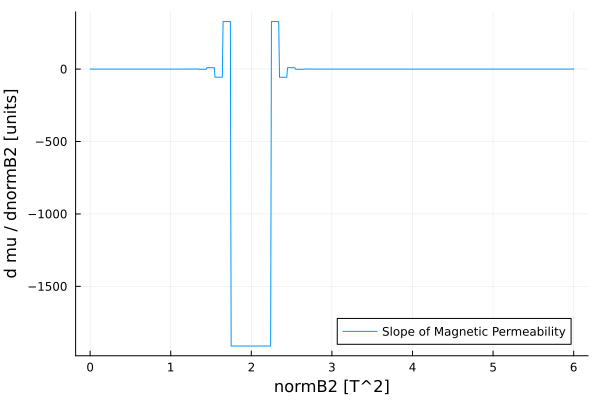

In [7]:
dmurSpline = (Derivative(2) * hnormSpline).(bnorm2)
plot(bnorm2,dmurSpline,label="Slope of Magnetic Permeability")
xlabel!("normB2 [T^2]") 
ylabel!("d mu / dnormB2 [units]")